In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../데이터자료/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../데이터자료/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../데이터자료/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../데이터자료/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../데이터자료/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../데이터자료/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../데이터자료/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../데이터자료/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../데이터자료/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../데이터자료/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../데이터자료/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../데이터자료/코스닥주가.csv", encoding='cp949') 

In [3]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10649,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10650,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10651,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [4]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [5]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit =data_logit.sort_values('[제조]총자본사업이익률', ascending=False)
data_logit

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
5295,(주)제놀루션,225220,2020-04-01,20200724,NaN,의료용 물질 및 의약품 제조업,5,523.86,111.26,21987.57,6.03,18.43,1.83,277.58,2562.56,10.41,31714.41
2752,(주)씨젠,96530,2020-04-01,20100910,NaN,의료용 물질 및 의약품 제조업,5,459.27,104.94,42891.46,6.10,7.25,1.70,82.10,4919.69,10.72,496.01
10275,피씨엘(주),241820,2020-04-01,20170223,NaN,의료용 물질 및 의약품 제조업,5,176.65,86.61,5629.36,8.19,206.80,1.99,69.11,729.24,15.19,66.35
1555,(주)바이오니아,64550,2020-04-01,20051229,NaN,의료용 물질 및 의약품 제조업,5,132.85,77.02,8284.65,3.06,25.83,1.98,92.95,1158.73,26.28,52.65
1391,(주)멕아이씨에스,58110,2020-04-01,20151214,NaN,"의료, 정밀, 광학기기 및 시계 제조업",5,184.05,63.60,11039.25,3.20,14.64,1.69,16.21,1105.50,17.92,143.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,(주)코아에스앤아이,52350,2011-04-01,20010720,2012-04-17,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",4,-69.30,-75.75,874.42,0.40,17.22,0.59,0.05,223.22,0.00,-4493653.05
2798,(주)아라온테크,41060,2011-04-01,20000607,2014-05-08,출판업,4,-80.89,-80.59,446.59,0.22,2.54,0.51,40.06,129.70,0.00,-68.88
3792,(주)엔스퍼트,98400,2011-04-01,20080130,2012-07-24,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4,-66.74,-81.63,681.50,2.11,3.13,0.66,0.37,0.00,0.00,-10.41
6943,(주)폴리플러스,65610,2011-04-01,20021206,2012-05-01,화학물질 및 화학제품 제조업; 의약품 제외,4,-60.96,-82.74,533.94,1.71,14.18,1.47,8.39,33.79,0.00,-19.76


In [6]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18984\1595854488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2012["투자일자"] = "2012-04-02"
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18984\1595854488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2017["투자일자"] = "2017-04-03"
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18984\1595854488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [7]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [8]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [9]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [10]:
data_logit_2011

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
4711,(주)유진테크,84370,2011-04-01,20060117,NaN,기타 기계 및 장비 제조업,5,78.23,32.24,9861.80,6.15,9.01,1.06,53.03,1126.63,16.31,2.461920e+03
5296,(주)제닉,123330,2011-04-01,20110803,NaN,화학물질 및 화학제품 제조업; 의약품 제외,5,98.05,31.08,21632.71,5.50,15.22,2.84,45.34,1907.32,30.79,8.776000e+01
3255,(주)에스비엠,37630,2011-04-01,19991224,2013-07-24,기타 기계 및 장비 제조업,4,41.82,30.40,1757.64,5.73,12.88,0.96,39.76,413.36,23.62,1.698600e+02
5137,(주)인포바인,115310,2011-04-01,20100209,NaN,우편 및 통신업,5,12.65,29.77,5083.18,13.16,9.18,0.39,240.44,2532.09,21.60,5.157293e+03
8965,에스맥(주),97780,2011-04-01,20080123,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,45.40,28.79,54116.78,13.95,10.63,2.76,30.31,2030.23,23.91,4.377000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,(주)코아에스앤아이,52350,2011-04-01,20010720,2012-04-17,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",4,-69.30,-75.75,874.42,0.40,17.22,0.59,0.05,223.22,0.00,-4.493653e+06
2798,(주)아라온테크,41060,2011-04-01,20000607,2014-05-08,출판업,4,-80.89,-80.59,446.59,0.22,2.54,0.51,40.06,129.70,0.00,-6.888000e+01
3792,(주)엔스퍼트,98400,2011-04-01,20080130,2012-07-24,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4,-66.74,-81.63,681.50,2.11,3.13,0.66,0.37,0.00,0.00,-1.041000e+01
6943,(주)폴리플러스,65610,2011-04-01,20021206,2012-05-01,화학물질 및 화학제품 제조업; 의약품 제외,4,-60.96,-82.74,533.94,1.71,14.18,1.47,8.39,33.79,0.00,-1.976000e+01


In [11]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [12]:
stock_2011[stock_2011["trade"]=="buy"]
stock_2012[stock_2012["trade"]=="buy"]
stock_2013[stock_2013["trade"]=="buy"]
stock_2014[stock_2014["trade"]=="buy"]
stock_2015[stock_2015["trade"]=="buy"]
stock_2016[stock_2016["trade"]=="buy"]
stock_2017[stock_2017["trade"]=="buy"]
stock_2018[stock_2018["trade"]=="buy"]
stock_2019[stock_2019["trade"]=="buy"]
stock_2020[stock_2020["trade"]=="buy"]
# stock_2011[stock_2011["trade"]=="buy"]

,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
12350,(주)넥슨게임즈,225570,2020-04-01,6200,0.052632,20150925,NaN,출판업,5.0,29.44,31.21,2822.73,4.25,6.96,1.05,133.93,460.40,63.04,49.30,buy
13334,(주)노바텍,285490,2020-04-01,4817,-0.024109,20181102,NaN,기타 제품 제조업,5.0,158.43,41.14,13526.81,4.19,19.35,1.06,298.80,2834.30,22.57,31.13,buy
27987,(주)디바이스이엔지,187870,2020-04-01,11750,-0.036885,20171220,NaN,기타 기계 및 장비 제조업,5.0,45.87,33.19,17930.90,5.03,14.14,0.80,116.73,2808.50,24.81,2972.35,buy
28725,(주)디알젬,263690,2020-04-01,7410,-0.033898,20181122,NaN,"의료, 정밀, 광학기기 및 시계 제조업",5.0,15.20,33.94,9412.62,5.66,9.55,1.52,70.36,927.65,38.52,198.94,buy
35121,(주)랩지노믹스,84650,2020-04-01,6670,-0.141901,20141216,NaN,연구개발업,5.0,121.03,50.31,10434.68,5.47,3.79,1.06,151.24,1424.32,17.93,245.34,buy
44496,(주)멕아이씨에스,58110,2020-04-01,12288,0.299218,20151214,NaN,"의료, 정밀, 광학기기 및 시계 제조업",5.0,184.05,63.60,11039.25,3.20,14.64,1.69,16.21,1105.50,17.92,143.51,buy
49096,(주)바이오니아,64550,2020-04-01,15600,-0.018868,20051229,NaN,의료용 물질 및 의약품 제조업,5.0,132.85,77.02,8284.65,3.06,25.83,1.98,92.95,1158.73,26.28,52.65,buy
74540,(주)수젠텍,253840,2020-04-01,29450,-0.086822,20190528,NaN,의료용 물질 및 의약품 제조업,5.0,59.52,39.07,3086.78,2.48,14.23,0.78,264.81,825.17,0.00,38.84,buy
84069,(주)씨젠,96530,2020-04-01,47593,-0.147614,20100910,NaN,의료용 물질 및 의약품 제조업,5.0,459.27,104.94,42891.46,6.10,7.25,1.70,82.10,4919.69,10.72,496.01,buy
112161,(주)에코마케팅,230360,2020-04-01,12325,-0.021825,20160808,NaN,전문 서비스업,5.0,39.70,35.65,10928.54,7.70,9.21,0.99,102.70,4452.48,18.11,1102.88,buy


In [13]:
print(stock_2011[stock_2011["trade"]=="buy"]["회사명"].unique())
print(stock_2012[stock_2012["trade"]=="buy"]["회사명"].unique())
print(stock_2013[stock_2013["trade"]=="buy"]["회사명"].unique())
print(stock_2014[stock_2014["trade"]=="buy"]["회사명"].unique())
print(stock_2015[stock_2015["trade"]=="buy"]["회사명"].unique())
print(stock_2016[stock_2016["trade"]=="buy"]["회사명"].unique())
print(stock_2017[stock_2017["trade"]=="buy"]["회사명"].unique())
print(stock_2018[stock_2018["trade"]=="buy"]["회사명"].unique())
print(stock_2019[stock_2019["trade"]=="buy"]["회사명"].unique())
print(stock_2020[stock_2020["trade"]=="buy"]["회사명"].unique())

['(주)고영테크놀러지' '(주)마이크로컨텍솔루션' '(주)셀피글로벌' '(주)아나패스' '(주)에스비엠' '(주)유아이디'
 '(주)유진테크' '(주)율호' '(주)인포바인' '(주)제주반도체' '(주)컴투스홀딩스' '(주)크레버스'
 '(주)티브로드한빛방송' '(주)피엘에이' '(주)한컴위드' '덕산하이메탈(주)' '리노공업(주)' '에스맥(주)'
 '엑스큐어(주)' '차이나그레이트스타인터내셔널리미티드']
['(주)고영테크놀러지' '(주)금화피에스시' '(주)메디톡스' '(주)서산' '(주)아나패스' '(주)아이디스' '(주)아이에스시'
 '(주)에프알텍' '(주)와이지엔터테인먼트' '(주)윈스' '(주)유아이디' '(주)유진테크' '(주)이엠텍' '(주)인포바인'
 '(주)컴투스' '(주)컴투스홀딩스' '(주)파트론' '덕산하이메탈(주)' '리노공업(주)' '키네마스터(주)']
['(주)금화피에스시' '(주)노블엠앤비' '(주)메디톡스' '(주)모다이노칩' '(주)모베이스' '(주)서원인텍'
 '(주)쎌바이오텍' '(주)아이에스시' '(주)유아이디' '(주)이녹스' '(주)이엠텍' '(주)이크레더블' '(주)인포바인'
 '(주)지디' '(주)진로발효' '(주)파트론' '리노공업(주)' '에스맥(주)' '차이나그레이트스타인터내셔널리미티드'
 '키네마스터(주)']
['(주)고영테크놀러지' '(주)내츄럴엔도텍' '(주)디엔에프' '(주)라이온켐텍' '(주)리더스코스메틱' '(주)마이크로컨텍솔루션'
 '(주)메디톡스' '(주)모베이스' '(주)블루콤' '(주)서산' '(주)쎌바이오텍' '(주)아나패스' '(주)아바텍'
 '(주)위메이드플레이' '(주)이크레더블' '(주)진로발효' '(주)컴투스' '(주)토비스' '리노공업(주)' '삼목에스폼(주)']
['(주)동원개발' '(주)디에스케이' '(주)디엔에프' '(주)라이온켐텍' '(주)리더스코스메틱' '(주)메디톡스' '(주)서산'
 '(주)슈피겐코리아' '(주)쎌바이오텍' '(주)엘아이에스' '(주)와이제이엠게임

In [14]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [15]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [16]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [17]:
stock_2011[stock_2011["trade"]=="sell"]

,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
1249,(주)고영테크놀러지,98460,2012-03-30,3569,0.017099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
25491,(주)마이크로컨텍솔루션,98120,2012-03-30,4150,0.007282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
48512,(주)셀피글로벌,68940,2012-03-30,1388,-0.016997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
58598,(주)아나패스,123860,2012-03-30,13150,0.069106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
68389,(주)에스비엠,37630,2012-03-30,2840,0.003534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
100328,(주)유아이디,69330,2012-03-30,12820,0.001563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
101578,(주)유진테크,84370,2012-03-30,22579,0.006643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
101828,(주)율호,72770,2012-03-30,1148,-0.020478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
110645,(주)인포바인,115310,2012-03-30,19650,-0.012563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
117559,(주)제주반도체,80220,2012-03-30,3365,0.021244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell


In [18]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [19]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [20]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,1.142676,1.011427
1,2011-04-05,-0.041291,0.999587
2,2011-04-06,0.071781,1.000718
3,2011-04-07,2.191835,1.021918
4,2011-04-08,-0.336044,0.996640
...,...,...,...
2448,2021-03-25,-1.259296,0.987407
2449,2021-03-26,0.928410,1.009284
2450,2021-03-29,-1.036696,0.989633
2451,2021-03-30,0.303004,1.003030


In [21]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [22]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [23]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [24]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [25]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [26]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [27]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [28]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [29]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,1.142676,1.011427,1.011427,1.011427,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,-0.041291,0.999587,1.011009,1.011009,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,0.071781,1.000718,1.011735,1.011735,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,2.191835,1.021918,1.033910,1.033910,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,-0.336044,0.996640,1.030436,1.030436,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-1.259296,0.987407,36.959371,2.435069,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,0.928410,1.009284,37.302505,2.457676,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,-1.036696,0.989633,36.915792,2.432198,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,0.303004,1.003030,37.027648,2.439567,10.0,958.06,388660278311558,0.415051,0.004349


In [30]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,1.142676,1.011427,1.011427,1.011427,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,-0.041291,0.999587,1.011009,1.011009,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,0.071781,1.000718,1.011735,1.011735,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,2.191835,1.021918,1.033910,1.033910,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,-0.336044,0.996640,1.030436,1.030436,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-1.259296,0.987407,36.959371,2.435069,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,0.928410,1.009284,37.302505,2.457676,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,-1.036696,0.989633,36.915792,2.432198,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,0.303004,1.003030,37.027648,2.439567,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [31]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,1.142676,1.011427,1.011427,1.011427,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,-0.041291,0.999587,1.011009,1.011009,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,0.071781,1.000718,1.011735,1.011735,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,2.191835,1.021918,1.033910,1.033910,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,-0.336044,0.996640,1.030436,1.030436,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-1.259296,0.987407,36.959371,2.435069,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,0.928410,1.009284,37.302505,2.457676,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,-1.036696,0.989633,36.915792,2.432198,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,0.303004,1.003030,37.027648,2.439567,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [32]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [33]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [34]:
stock_rtn_all[490:505]

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
490,2013-03-25,0.203583,1.002036,2.640894,1.827925,2.0,549.56,122836307769308,-0.306576,-0.002275,-0.306576,0.996934,1.028457,1.053200
491,2013-03-26,0.501829,1.005018,2.654147,1.837098,2.0,549.90,122920014052292,0.061868,0.000681,0.061868,1.000619,1.029093,1.053852
492,2013-03-27,-0.490882,0.995091,2.641118,1.828080,2.0,548.72,122659767622917,-0.214584,-0.002117,-0.214584,0.997854,1.026885,1.051591
493,2013-03-28,0.394700,1.003947,2.651542,1.835295,2.0,552.64,123537571806713,0.714390,0.007156,0.714390,1.007144,1.034221,1.059103
494,2013-03-29,0.946630,1.009466,2.676643,1.852668,2.0,555.02,124020587600936,0.430660,0.003910,0.430660,1.004307,1.038675,1.063664
495,2013-04-02,1.079362,1.010794,2.705533,1.010794,3.0,552.83,123545583208574,-0.205787,-0.002124,-0.205787,0.997942,1.036537,0.997942
496,2013-04-03,2.088580,1.020886,2.762040,1.031905,3.0,557.96,124727364942628,0.927953,0.009566,0.927953,1.009280,1.046156,1.007203
497,2013-04-04,-0.670920,0.993291,2.743509,1.024982,3.0,555.23,124124104831224,-0.489282,-0.004837,-0.489282,0.995107,1.041037,1.002274
498,2013-04-05,-0.684607,0.993154,2.724727,1.017965,3.0,547.51,122387758967786,-1.390415,-0.013989,-1.390415,0.986096,1.026563,0.988339
499,2013-04-08,-4.138518,0.958615,2.611964,0.975836,3.0,528.78,118098161236530,-3.420942,-0.035049,-3.420942,0.965791,0.991445,0.954528


In [35]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [36]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [37]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,1.142676,1.142676,1.142676,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,-0.041291,1.100913,1.100913,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,0.071781,1.173484,1.173484,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,2.191835,3.391040,3.391040,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,-0.336044,3.043601,3.043601,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,-1.259296,3595.937100,143.506880,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,0.928410,3630.250548,145.767622,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,-1.036696,3591.579176,143.219758,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,0.303004,3602.764819,143.956724,958.06,0.415051,78.341459,73.611916,10.0


In [38]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


0         1.342664
1         0.966037
2         1.612639
3        12.988253
4        11.773480
           ...    
2448    126.767707
2449    126.983172
2450    126.740210
2451    126.810727
2452    126.753334
Name: 누적수익률(%), Length: 2453, dtype: float64


In [39]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.08


In [40]:
Sharpe *np.sqrt(252)

1.2630055152920243

In [41]:
Std

1.596622128759122

In [42]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.9780968852696605

In [43]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [44]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [45]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.142676,1.142676,1.142676,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,-0.041291,1.100913,1.100913,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.071781,1.173484,1.173484,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,2.191835,3.391040,3.391040,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.336044,3.043601,3.043601,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,0.056642,45.749996,45.749996,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.214628,45.437176,45.437176,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.721153,44.388351,44.388351,519.56,-0.417833,-2.349359,-2.349359,1.0


In [46]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.4133245667204215
1.7904131329460222
Sharpe ratio: 0.09
1.402475379154249


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.142676,1.142676,1.142676,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,-0.041291,1.100913,1.100913,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.071781,1.173484,1.173484,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,2.191835,3.391040,3.391040,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.336044,3.043601,3.043601,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,0.056642,45.749996,45.749996,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.214628,45.437176,45.437176,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.721153,44.388351,44.388351,519.56,-0.417833,-2.349359,-2.349359,1.0


In [47]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012


-0.48900395276570674
1.2632587287114745
Sharpe ratio: 0.18
2.868682477400702


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-0.689969,43.478155,-0.689969,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-1.855885,40.815366,-2.533049,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.140966,40.616864,-2.670444,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,1.986843,43.410700,-0.736659,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-1.957954,40.602785,-2.680189,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,0.203583,164.089374,82.792453,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,0.501829,165.414651,83.709758,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,-0.490882,164.111779,82.807961,548.72,-0.214584,2.688501,5.159065,2.0


In [48]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013

-0.21021228513525322
1.426620953894565
Sharpe ratio: 0.04
0.6878439881790671


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,1.079362,170.553323,1.079362,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,2.088580,176.204047,3.190486,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-0.670920,174.350939,2.498161,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-0.684607,172.472712,1.796451,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-4.138518,161.196380,-2.416414,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-1.208809,196.432117,10.747741,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,0.914447,199.142833,11.760471,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,0.434735,200.443312,12.246333,541.46,-0.490692,1.521912,-2.258245,3.0


In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014

-0.5265080879020629
1.064956338665326
Sharpe ratio: 0.23
3.6775837468458192


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,2.139952,207.538024,2.139952,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.865002,210.198233,3.023464,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,1.172593,213.835596,4.231510,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-1.111724,210.346612,3.072744,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.922327,207.484200,2.122075,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,0.166249,549.396943,115.678606,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-1.480204,539.784542,112.486122,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-0.333935,537.648077,111.776556,640.12,-0.375080,18.380944,16.580462,4.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015

-0.31556954552085653
1.6850160624301782
Sharpe ratio: 0.04
0.5997106320656913


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,1.459492,554.943766,1.459492,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,1.461663,564.516833,2.942487,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,2.861484,583.531878,5.888170,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.894764,589.647872,6.835619,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,0.913789,595.949800,7.811871,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,-0.838510,700.024226,23.934383,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,-0.700337,694.421360,23.066424,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,0.357492,697.261356,23.506377,686.50,1.476697,27.009020,5.578026,5.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016

-0.16701426233409888
1.0347817989750532
Sharpe ratio: 0.07
1.189339756958448


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,1.254164,701.884255,1.254164,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,0.067250,702.423524,1.322258,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,1.354243,713.290288,2.694408,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,0.830955,720.048366,3.547752,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,1.014279,728.365944,4.598015,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-0.711146,735.399862,5.486190,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,1.436737,747.402360,7.001749,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.390549,750.711885,7.419644,613.63,0.220487,13.147688,-11.156959,6.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017

-0.37327425617751436
1.324402266736826
Sharpe ratio: 0.03
0.5533018541843489


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,0.749663,764.265301,0.749663,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,0.725205,770.532998,1.480305,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,0.532967,775.172650,2.021161,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,-0.327706,772.304660,1.686832,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-2.064930,754.292182,-0.412930,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,3.110985,1228.043417,54.813489,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,-0.135335,1226.246111,54.603972,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-1.248341,1209.690030,52.673987,850.97,-0.916352,54.604205,35.392668,7.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018

-0.32062663704056565
1.5235625664094377
Sharpe ratio: 0.05
0.7868916999677985


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,0.799163,1235.770163,0.799163,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,-1.751000,1212.380822,-0.965831,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,1.936852,1237.799702,0.952315,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,-0.850322,1226.424101,0.093895,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,-0.332881,1222.008687,-0.239298,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-2.996528,1217.078597,-0.611330,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,1.333170,1234.637493,0.713690,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,-0.063418,1233.791094,0.649819,728.45,-1.134621,32.846520,-16.057847,8.0


In [54]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019


-0.3650118302229957
1.9770394457371498
Sharpe ratio: 0.08
1.2527168709026042


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,1.454128,1250.324125,1.454128,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,0.550055,1257.751656,2.012182,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,0.296677,1261.779798,2.314829,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,1.340400,1280.033093,3.686257,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,1.710524,1303.638895,5.459836,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,4.808744,1316.674155,6.439216,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,0.015296,1316.890854,6.455497,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,1.241531,1334.481996,7.777175,522.83,1.204003,-5.622691,-29.041408,9.0


In [55]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.6284283747834727
2.352161651922881
Sharpe ratio: 0.07
1.0471140008455888


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,-2.804390,1375.230857,-2.804390,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,4.400224,1440.144322,1.472435,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,7.443023,1554.777611,9.025051,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,-0.552668,1545.632186,8.422505,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,1.326562,1567.462522,9.860797,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,-1.259296,3595.937100,143.506880,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,0.928410,3630.250548,145.767622,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,-1.036696,3591.579176,143.219758,954.10,-0.271768,77.604311,72.894317,10.0


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54260 (\N{HANGUL SYLLABLE POL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:15

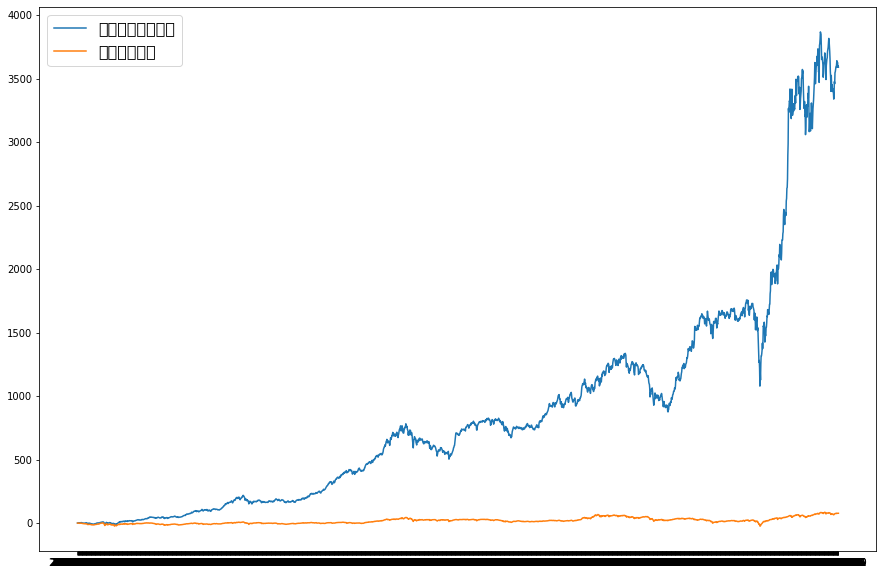

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)

plt.show()

In [57]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(100,200)})

fig, axes = plt.subplots(5,2)
# sns.lineplot(x=rtn_2011['투자일자'],y='수익률',data=rtn_2011[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[0,0].plot(rtn_2011[["연누적수익률(%)","코스닥연누적수익률(%)"]])

axes[0,1].plot(rtn_2012[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[1,0].plot(rtn_2013[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[1,1].plot(rtn_2014[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[2,0].plot(rtn_2015[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[2,1].plot(rtn_2016[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[3,0].plot(rtn_2017[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[3,1].plot(rtn_2018[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[4,0].plot(rtn_2019[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[4,1].plot(rtn_2020[["연누적수익률(%)","코스닥연누적수익률(%)"]])

: 